In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Importing some required libraries and importing our dataset and saved it to variable churn. We have to predict the churn of the customer. So, this means churn column is our target variable. We can see that this column is having value YES and NO. So, we have to build a classification model.

In [3]:
df.shape

(7043, 21)

Dataframe has 7043 rows and 21 column

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no null values

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

except for SeniorCitizen, tenure, MonthlyCharges columns all columns has object type value

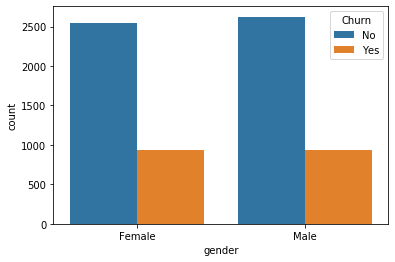

In [7]:
sns.countplot(x=df['gender'],hue=df['Churn'])

both female male customer has equally retain in the company

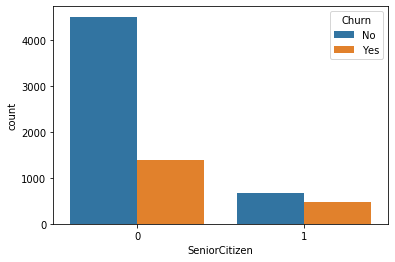

In [8]:
sns.countplot(x=df['SeniorCitizen'],hue=df['Churn'])

young people are more retained in the company

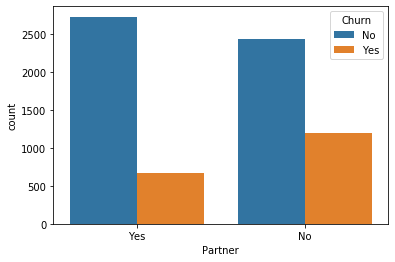

In [9]:
sns.countplot(x=df['Partner'],hue=df['Churn'])

customers who have partners are retaining in the company

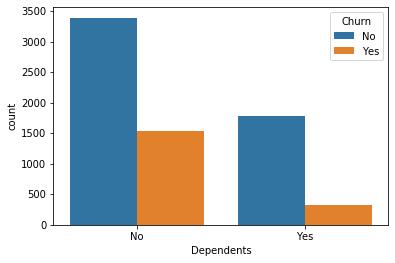

In [10]:
sns.countplot(x=df['Dependents'],hue=df['Churn'])

customers who have dependents are retaining in the company

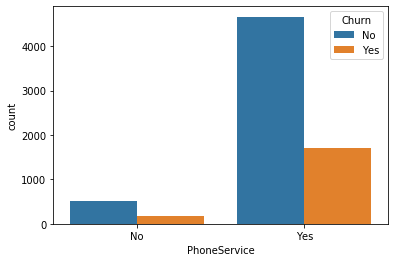

In [11]:
sns.countplot(x=df['PhoneService'],hue=df['Churn'])

customer who having phone service are continuing in the company

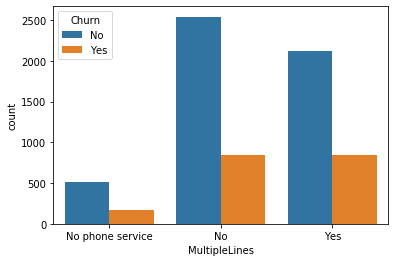

In [12]:
sns.countplot(x=df['MultipleLines'],hue=df['Churn'])

customers who having single line are continuing in the company

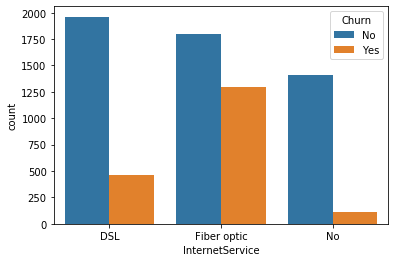

In [13]:
sns.countplot(x=df['InternetService'],hue=df['Churn'])

customers who having DSL internet service are retaining in the company

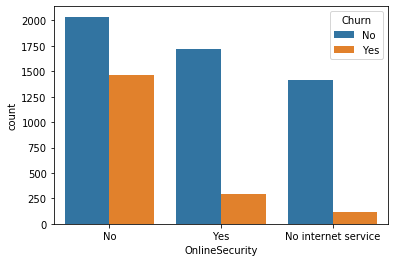

In [14]:
sns.countplot(x=df['OnlineSecurity'],hue=df['Churn'])

percentage of people who having online security and no internet service will stay in the company

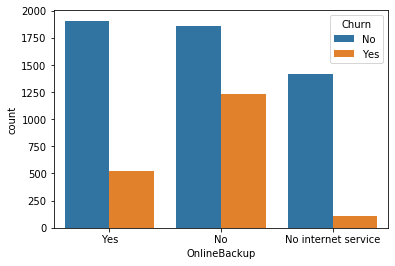

In [15]:
sns.countplot(x=df['OnlineBackup'],hue=df['Churn'])

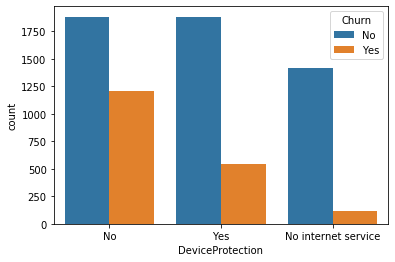

In [16]:
sns.countplot(x=df['DeviceProtection'],hue=df['Churn'])

percentage of people who having online security and no internet service will stay in the company

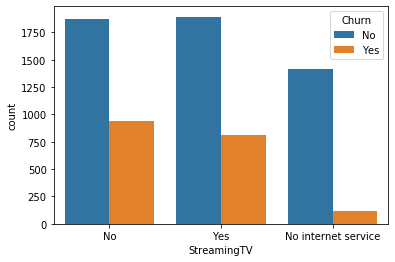

In [17]:
sns.countplot(x=df['StreamingTV'],hue=df['Churn'])

percentage of customer who has streaming tv,streaming movies will stay in the company

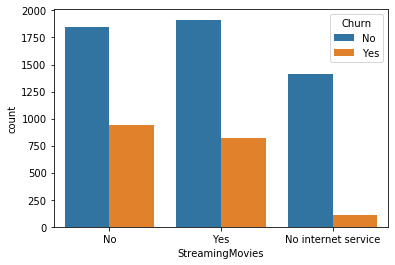

In [18]:
sns.countplot(x=df['StreamingMovies'],hue=df['Churn'])

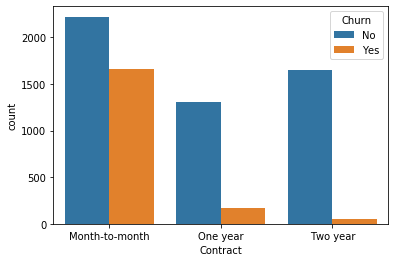

In [19]:
sns.countplot(x=df['Contract'],hue=df['Churn'])

customer who has contract will retain in the company

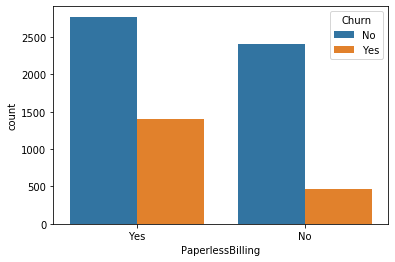

In [20]:
sns.countplot(x=df['PaperlessBilling'],hue=df['Churn'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

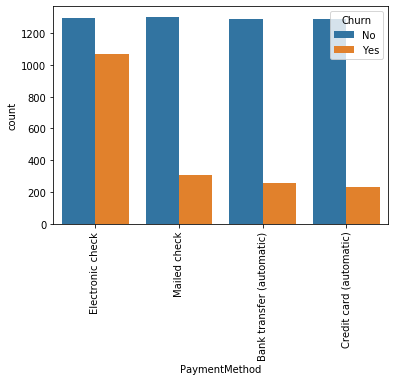

In [21]:
sns.countplot(x=df['PaymentMethod'],hue=df['Churn'])
plt.xticks( rotation=90)

Except customer who is doing payment in electronic check will retain as customer

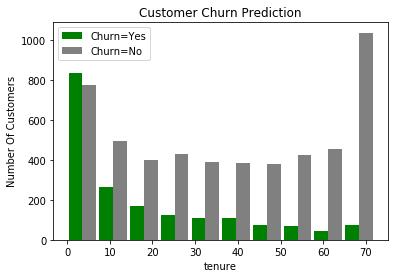

In [22]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.9, color=['green','grey'],label=['Churn=Yes','Churn=No'])
plt.legend()

Increasing with tenure customer will retain

In [23]:
df_mod=df
col_encod=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','TotalCharges','Churn']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    df_mod[col]= label.fit_transform(df[col])

label encoding to convert categorical column to numerical

In [24]:
df_mod.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


MULTIVARIATE ANALYSIS

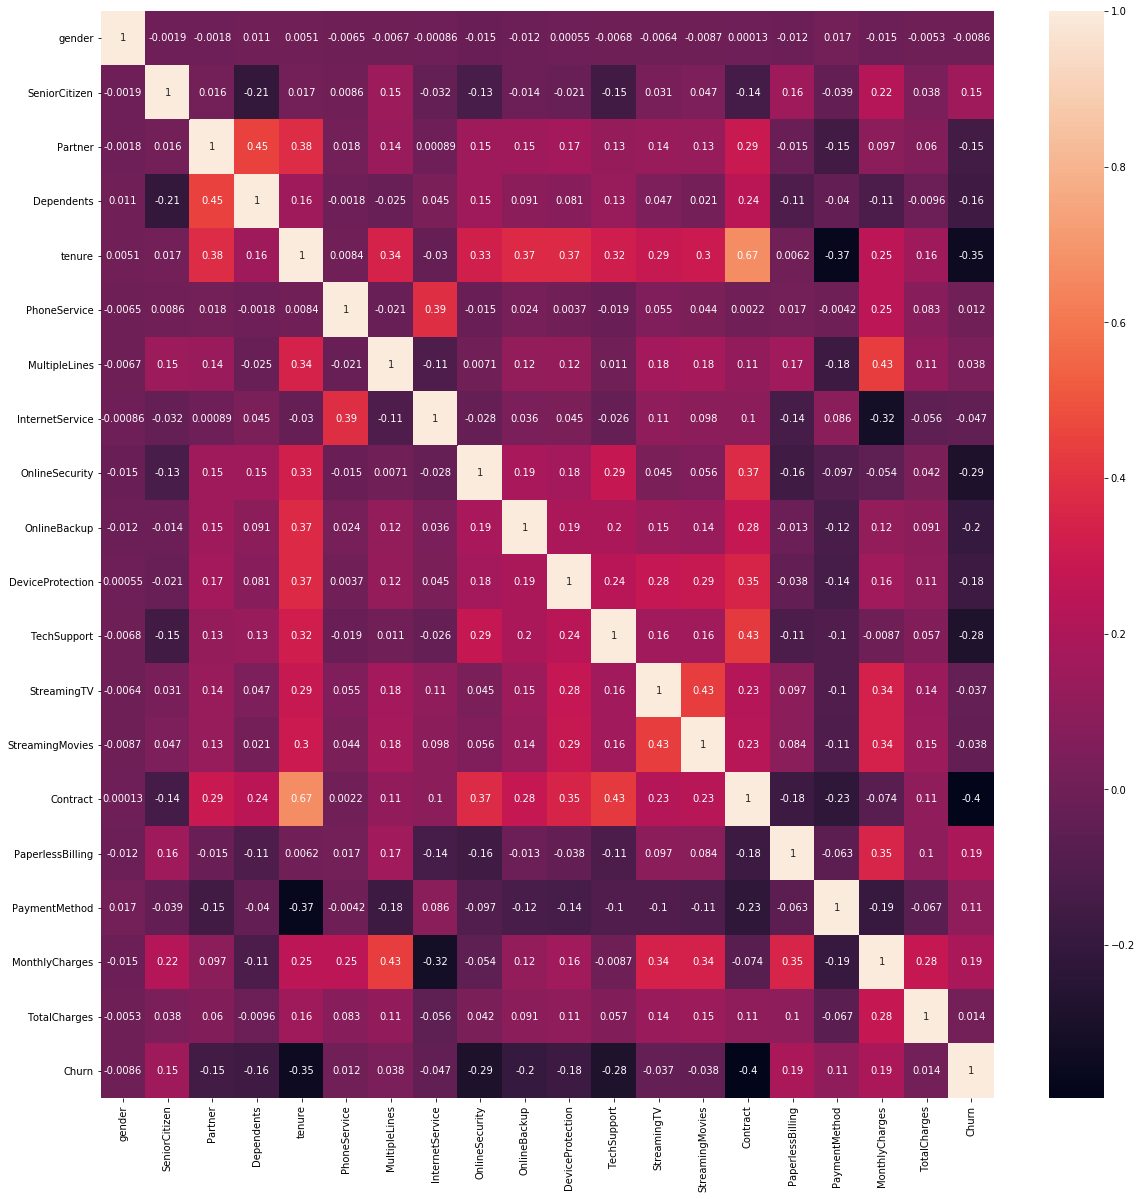

In [25]:
correlation=df_mod.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

tenure ,contract features are higly corelated with churn.the customers who having high tenure and long year contract will not churned from the company



In [26]:
col_to_scale = ['tenure','MonthlyCharges']
df_new=df_mod
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_new[col_to_scale] = scaler.fit_transform(df_mod[col_to_scale])

To scale the unscaled data ,I have used minmax scalar transmormation because min max scalar does not lose any data.if I use any other scalar like zscore it will lose some data which inturn decrease the accuracy


In [27]:
cols_d=['customerID','Churn']
x=df_new.drop(cols_d,axis=1)
y=df_new['Churn']

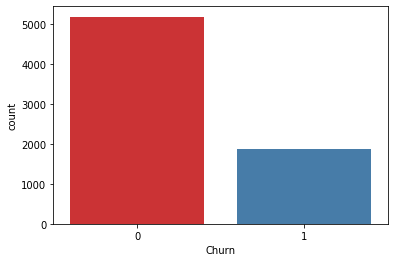

In [28]:
sns.countplot(y,palette="Set1")

class imbalance in target value

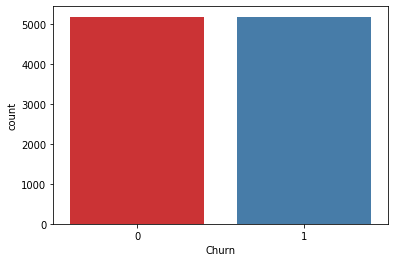

In [29]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()
x,y=os.fit_resample(x,y)
sns.countplot(y,palette="Set1")

class imbalance is solved

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)

models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [51]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.7935578330893118 

"Confusion Matrix:
" [[1261  444]
 [ 261 1449]]
classification_report
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1705
           1       0.77      0.85      0.80      1710

    accuracy                           0.79      3415
   macro avg       0.80      0.79      0.79      3415
weighted avg       0.80      0.79      0.79      3415

Average accuracy_score 0.7935578330893118
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8392386530014642 

"Confusion Matrix:
" [[1416  289]
 [ 260 1450]]
classification_report
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1705
           1       0.83      0.85      0.84      1710

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.

cross validation

In [33]:
scorel=[]

In [34]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.72705314, 0.73623188, 0.8173913 , 0.8298695 , 0.82310295])

In [35]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.70676329, 0.75072464, 0.89565217, 0.90768487, 0.90333494])

In [36]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.68115942, 0.70096618, 0.72657005, 0.73658772, 0.73272112])

In [37]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.71932367, 0.76280193, 0.8763285 , 0.87820203, 0.89028516])

In [38]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.67391304, 0.71304348, 0.84444444, 0.82938618, 0.86080232])

Difference between predicted model and cross validation

In [39]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [-0.06650469 -0.05732595  0.02383347  0.03631167  0.02954512]
RandomForestClassifier() difference is [-0.13540363 -0.09144227  0.05348526  0.06551796  0.06116803]
KNeighborsClassifier() difference is [-0.01781569  0.00199107  0.02759494  0.03761261  0.03374601]
GradientBoostingClassifier() difference is [-0.11874368 -0.07526542  0.03826115  0.04013468  0.05221781]
DecisionTreeClassifier() difference is [-0.10793176 -0.06880132  0.06259964  0.04754137  0.07895752]


LogisticRegression has least difference

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[100, 10, 1.0, 0.1, 0.01,1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
model=LogisticRegression()
model_cv=GridSearchCV(model,grid,cv=10)
model_cv.fit(xtrain,ytrain)

print("tuned hpyerparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",(round(model_cv.best_score_,2))*100)

tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2'}
accuracy : 80.0


In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)

In [42]:
model_cv=LogisticRegression(C=1.0,penalty="l2")
model_cv.fit(xtrain,ytrain)
model_cv.score(xtest,ytest)

0.7935578330893118

In [43]:
y_pred_1 = model_cv.predict(xtest)

In [44]:
result = confusion_matrix(ytest, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[1261  444]
 [ 261 1449]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1705
           1       0.77      0.85      0.80      1710

    accuracy                           0.79      3415
   macro avg       0.80      0.79      0.79      3415
weighted avg       0.80      0.79      0.79      3415

Accuracy: 0.7935578330893118


No Skill: ROC AUC=0.500
model: ROC AUC=0.793


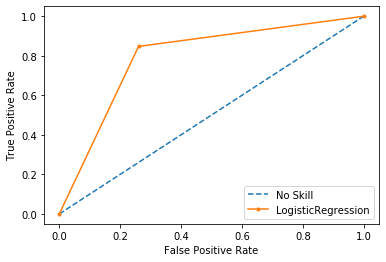

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=7)
m=LogisticRegression(C=1.0,penalty="l2")
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='LogisticRegression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy=  0.7944363103953148

SAVING THE MODEL

In [46]:
from joblib import dump
dump(model_cv, 'customer_churn.joblib')

['customer_churn.joblib']

In [47]:
from joblib import load
loaded = load('customer_churn.joblib')